In [1]:
import json
import pandas as pd
from pathlib import Path

log_path = Path("data/trade_log.json")

if log_path.exists():
    with open(log_path, "r") as f:
        trades = json.load(f)
else:
    print("⚠️ No trade_log.json file found.")
    trades = []

# Load to DataFrame
df = pd.DataFrame(trades)
print(f"✅ Loaded {len(df)} trades")
df.head()

✅ Loaded 1 trades


,timestamp,ticker,strategy_name,description,entry_price,dte,target_pct,stop_pct,status
0,2025-04-18T22:03:08.413025,SPY,Diagonal Call Spread,"This strategy has high profit potential, align...",3.25,14,0.25,0.15,OPEN


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      1 non-null      object 
 1   ticker         1 non-null      object 
 2   strategy_name  1 non-null      object 
 3   description    1 non-null      object 
 4   entry_price    1 non-null      float64
 5   dte            1 non-null      int64  
 6   target_pct     1 non-null      float64
 7   stop_pct       1 non-null      float64
 8   status         1 non-null      object 
dtypes: float64(3), int64(1), object(5)
memory usage: 200.0+ bytes


timestamp        0
ticker           0
strategy_name    0
description      0
entry_price      0
dte              0
target_pct       0
stop_pct         0
status           0
dtype: int64

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 18.9 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 19.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


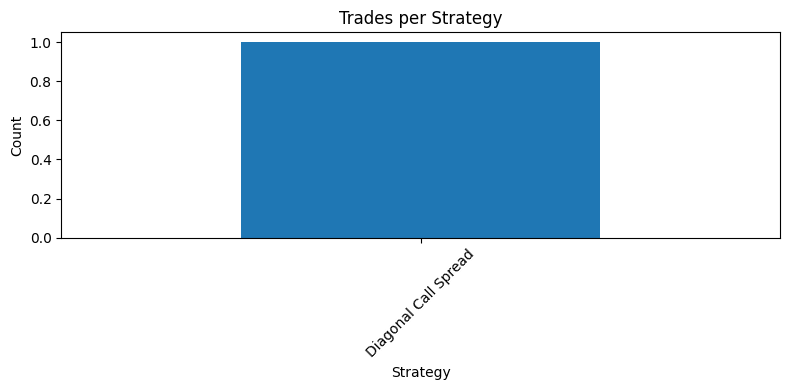

In [4]:
%pip install matplotlib
import matplotlib.pyplot as plt

df["strategy_name"].value_counts().plot(kind="bar", title="Trades per Strategy", figsize=(8, 4))
plt.xlabel("Strategy")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/btheard/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


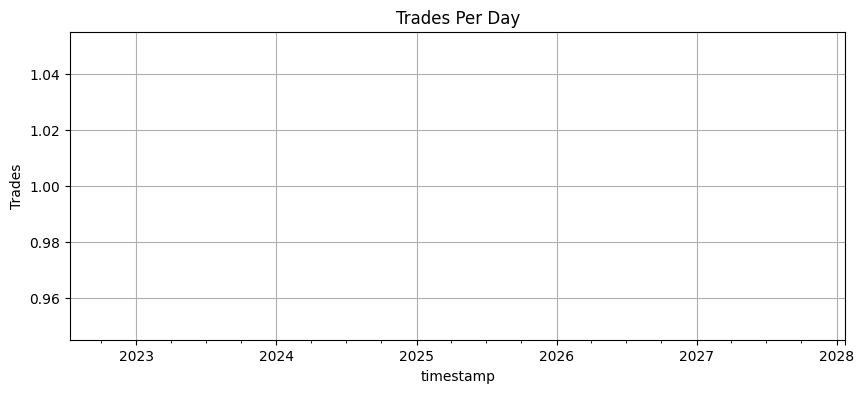

In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp")["strategy_name"].resample("D").count().plot(figsize=(10, 4), title="Trades Per Day")
plt.ylabel("Trades")
plt.grid(True)
plt.show()


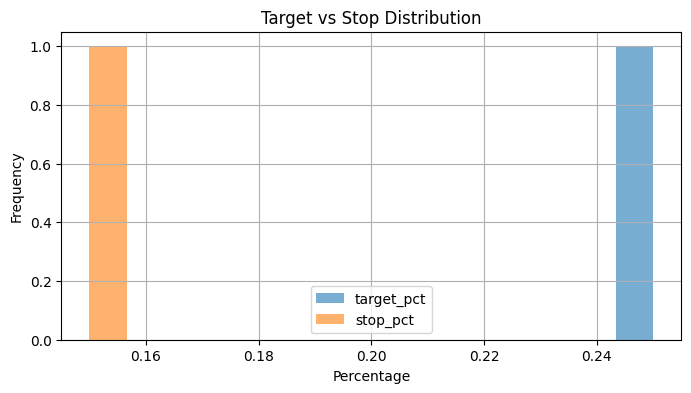

In [6]:
df[["target_pct", "stop_pct"]].plot.hist(bins=15, alpha=0.6, figsize=(8, 4))
plt.title("Target vs Stop Distribution")
plt.xlabel("Percentage")
plt.grid(True)
plt.show()

In [7]:
for name in df["strategy_name"].unique():
    desc = df[df["strategy_name"] == name]["description"].iloc[0]
    print(f"📘 {name}:\n{desc}\n{'-'*40}")

📘 Diagonal Call Spread:
This strategy has high profit potential, aligns well with the trader's understanding of time decay and use of options with different expiration dates, and is adaptable to a moderately bullish market.
----------------------------------------
